In [1]:
# env = geo_altair (clone of gis_clone_folium, with altair package added)

import pandas as pd
import altair as alt
import geopandas as gpd

## Massachusetts Shapefile

Nice low-res shapefile for the state

https://docs.digital.mass.gov/dataset/massgis-data-new-england-boundaries

Note that we can read the shapefile without unzipping if we know the name inside the zip file

In [2]:
land_shp = './newengland/NEWENGLAND_POLY.shp'
land = gpd.read_file(land_shp).to_crs('epsg:4326')
land

FIPS           NAME       ACRES    SHAPE_AREA     SHAPE_LEN  \
0    33  NEW HAMPSHIRE   5935592.8  2.401324e+10  9.028755e+05   
1     0        VERMONT   6138697.6  2.486846e+10  8.630178e+05   
2    25  MASSACHUSETTS   5104241.5  2.063503e+10  1.442175e+06   
3     9    CONNECTICUT   3162420.2  1.279752e+10  6.018469e+05   
4    44   RHODE ISLAND    612942.3  2.477726e+09  3.326268e+05   
5    44   RHODE ISLAND     34603.4  1.398129e+08  6.395384e+04   
6    23          MAINE  20639492.0  8.344433e+10  2.558386e+06   

                                            geometry  
0  POLYGON ((-71.08751 45.30145, -71.00860 44.282...  
1  POLYGON ((-71.50476 45.01328, -71.52872 44.999...  
2  POLYGON ((-73.25806 42.74605, -73.01970 42.740...  
3  POLYGON ((-73.48423 42.04743, -73.04563 42.036...  
4  POLYGON ((-71.22898 41.70769, -71.23976 41.697...  
5  POLYGON ((-71.19881 41.67850, -71.14121 41.655...  
6  POLYGON ((-69.57710 43.89326, -69.57868 43.883...

<AxesSubplot:>

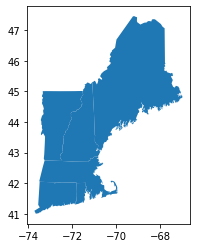

In [3]:
land.plot()

### Not zoomed

Unfortunately, I do not know a nice way to figure out the scale and translate to zoom in to the bay... 

In [4]:
mass_land = land.loc[land['NAME']=='MASSACHUSETTS',:]

alt.Chart(mass_land).mark_geoshape(
    fill='#2a1d0c', stroke='#706545', strokeWidth=0.5
).project('mercator')

alt.Chart(...)

## Acoustic Data

In [5]:
# read in acoustic metadata, parse date columns
ccb = pd.read_csv("../Data/Raw/CCB Metadata.csv",
                 sep = ',',
                 encoding = 'utf-8',
                 parse_dates = ['deployDate', 'recoveryDate'])
ccb.head()

c_recordOnDays                                     c_uniqueUnitID  \
0              71  2011_BRP_CCB_S1016_Dep20_20110217_PU0205_FD020...   
1              80  2011_BRP_CCB_S1016_Dep20_20110217_PU0206_FD020...   
2              80  2011_BRP_CCB_S1016_Dep20_20110217_PU0207_FD020...   
3              80  2011_BRP_CCB_S1016_Dep20_20110217_PU0208_FD020...   
4              80  2011_BRP_CCB_S1016_Dep20_20110217_PU0209_FD020...   

  deployDate  deploymentDepth_Meters dutyCycle_Flag  latitudeDeployed_DecDeg  \
0 2011-02-17                    37.2              N                  41.9412   
1 2011-02-17                    30.5              N                  41.8771   
2 2011-02-17                    30.9              N                  41.8948   
3 2011-02-17                    32.1              N                  41.9334   
4 2011-02-17                    42.1              N                  41.9508   

   longitudeDeployed_DecDeg recoveryDate  samplingRate_Hz  
0                  -70.2880   2011-05-08             5000  
1                  -70.2540   2011-05-08             5000  
2                  -70.4439   2011-05-08             5000  
3                  -70.1859   2011-05-08             5000  
4                  -70.3901   2011-05-08             5000

In [6]:
# add between days column, explode out (row for each day)
ccb['between_days'] = ccb.apply(lambda row: pd.date_range(row['deployDate'],row['recoveryDate'],freq='D'), axis=1)
ccb_days = ccb.explode('between_days').reset_index()
ccb_days

index  c_recordOnDays  \
0         0              71   
1         0              71   
2         0              71   
3         0              71   
4         0              71   
...     ...             ...   
3510     37             106   
3511     37             106   
3512     37             106   
3513     37             106   
3514     37             106   

                                         c_uniqueUnitID deployDate  \
0     2011_BRP_CCB_S1016_Dep20_20110217_PU0205_FD020... 2011-02-17   
1     2011_BRP_CCB_S1016_Dep20_20110217_PU0205_FD020... 2011-02-17   
2     2011_BRP_CCB_S1016_Dep20_20110217_PU0205_FD020... 2011-02-17   
3     2011_BRP_CCB_S1016_Dep20_20110217_PU0205_FD020... 2011-02-17   
4     2011_BRP_CCB_S1016_Dep20_20110217_PU0205_FD020... 2011-02-17   
...                                                 ...        ...   
3510   2018_BRP_CCB_S1074_Dep27_20180213_PU0222_FD03178 2018-02-13   
3511   2018_BRP_CCB_S1074_Dep27_20180213_PU0222_FD03178 2018-02-13   
3512   2018_BRP_CCB_S1074_Dep27_20180213_PU0222_FD03178 2018-02-13   
3513   2018_BRP_CCB_S1074_Dep27_20180213_PU0222_FD03178 2018-02-13   
3514   2018_BRP_CCB_S1074_Dep27_20180213_PU0222_FD03178 2018-02-13   

      deploymentDepth_Meters dutyCycle_Flag  latitudeDeployed_DecDeg  \
0                       37.2              N                41.941200   
1                       37.2              N                41.941200   
2                       37.2              N                41.941200   
3                       37.2              N                41.941200   
4                       37.2              N                41.941200   
...                      ...            ...                      ...   
3510                     NaN              N                41.937667   
3511                     NaN              N                41.937667   
3512                     NaN              N                41.937667   
3513                     NaN              N                41.937667   
3514                     NaN              N                41.937667   

      longitudeDeployed_DecDeg recoveryDate  samplingRate_Hz between_days  
0                   -70.288000   2011-05-08             5000   2011-02-17  
1                   -70.288000   2011-05-08             5000   2011-02-18  
2                   -70.288000   2011-05-08             5000   2011-02-19  
3                   -70.288000   2011-05-08             5000   2011-02-20  
4                   -70.288000   2011-05-08             5000   2011-02-21  
...                        ...          ...              ...          ...  
3510                -70.237983   2018-05-30             5000   2018-05-26  
3511                -70.237983   2018-05-30             5000   2018-05-27  
3512                -70.237983   2018-05-30             5000   2018-05-28  
3513                -70.237983   2018-05-30             5000   2018-05-29  
3514                -70.237983   2018-05-30             5000   2018-05-30  

[3515 rows x 11 columns]

In [ ]:
pd.DataFrame.to_csv(ccb_days, '../Data/Processed/')

## Interactive Visualization

Interaction is only sweeping out x-interval on bottom timeline

In [7]:
interval = alt.selection(type='interval', encodings=['x'])

timeline_base = alt.Chart(ccb_days).mark_rect().encode(
    y = alt.Y('c_recordOnDays:O', axis=alt.Axis(title='category')),
    color = 'c_recordOnDays:N'
).properties(
    width = 600
)

timeline_overview = timeline_base.encode(
    x = alt.X(
        'between_days:T', 
        timeUnit = 'yearmonthdate', 
        axis = alt.Axis(title='Date')
    )
).add_selection(
    interval
).properties(
    height = 40
)

timeline_detail = timeline_base.encode(
    x = alt.X(
        'between_days:T', 
        timeUnit='yearmonthdate',
        axis = alt.Axis(title=''),
        scale = alt.Scale(domain=interval)
    )
).properties(
    height = 100
)

basemap = alt.Chart(mass_land).mark_geoshape(
    fill = 'lightgray', stroke='#706545', strokeWidth=0.5
).project('mercator').properties(
    width = 600,
    height = 300
)

points = alt.Chart(ccb_days).mark_point().encode(
    longitude = 'longitudeDeployed_DecDeg:Q',
    latitude = 'latitudeDeployed_DecDeg:Q',
    color = 'c_recordOnDays:N'
).transform_filter(
    interval
).project("mercator").properties(
    width = 600,
    height = 300
)

alt.vconcat((basemap + points), timeline_detail, timeline_overview)

alt.VConcatChart(...)

### Break it up

In [10]:
interval = alt.selection(type='interval', encodings=['x'])

In [17]:
# lays out categories, this should be my data types
timeline_base = alt.Chart(ccb_days).mark_rect().encode(
    y = alt.Y('c_recordOnDays:O', axis=alt.Axis(title='category')),
    color = 'c_recordOnDays:N'
).properties(
    width = 600
)

timeline_base

alt.Chart(...)

In [18]:
# put data types on timeline (full horizontal timeline of between days)
timeline_overview = timeline_base.encode(
    x = alt.X(
        'between_days:T', 
        timeUnit = 'yearmonthdate', 
        axis = alt.Axis(title='Date')
    )
).add_selection(
    interval
).properties(
    height = 40
)

timeline_overview

alt.Chart(...)

In [19]:
# zoomed in timeline, not plotting
timeline_detail = timeline_base.encode(
    x = alt.X(
        'between_days:T', 
        timeUnit='yearmonthdate',
        axis = alt.Axis(title=''),
        scale = alt.Scale(domain=interval)
    )
).properties(
    height = 100
)

timeline_detail

alt.Chart(...)

In [22]:
# mass basemap polygon view
basemap = alt.Chart(mass_land).mark_geoshape(
    fill = 'lightgray', stroke='#706545', strokeWidth=0.5
).project('mercator').properties(
    width = 600,
    height = 300
)

basemap

alt.Chart(...)

In [24]:
# ccb hydrophone points
points = alt.Chart(ccb_days).mark_point().encode(
    longitude = 'longitudeDeployed_DecDeg:Q',
    latitude = 'latitudeDeployed_DecDeg:Q',
    color = 'c_recordOnDays:N'
).transform_filter(
    interval
).project("mercator").properties(
    width = 600,
    height = 300
)

points

alt.Chart(...)